# Author: Jagjeet Singh

## Task 4

### Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

### importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### importing the data

In [2]:
df=pd.read_csv('SampleSuperstore.csv')

In [3]:
pd.set_option('display.max_columns',None)

### taking a glance at the data

In [7]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


#### classifying data into regions

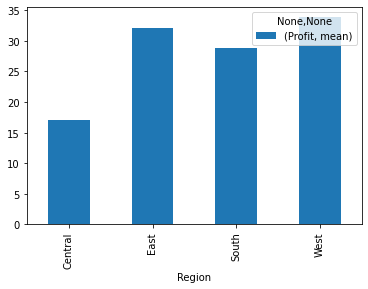

In [9]:
data=df.copy()
data.groupby(['Region']).agg({'Profit': ['mean']}).plot.bar()

#### it looks like central region is not doing good with respect to other regions

In [10]:
region=['Central','South','East','West']
d={}
for i in region:
    l=data[data['Region']==i]['State'].unique()
    d[i]=l
d    

{'Central': array(['Texas', 'Wisconsin', 'Nebraska', 'Illinois', 'Minnesota',
        'Michigan', 'Indiana', 'Iowa', 'Missouri', 'Oklahoma', 'Kansas',
        'South Dakota', 'North Dakota'], dtype=object),
 'South': array(['Kentucky', 'Florida', 'North Carolina', 'Virginia', 'Tennessee',
        'Alabama', 'South Carolina', 'Louisiana', 'Georgia', 'Mississippi',
        'Arkansas'], dtype=object),
 'East': array(['Pennsylvania', 'Delaware', 'New York', 'Ohio', 'Connecticut',
        'New Jersey', 'Massachusetts', 'Rhode Island', 'New Hampshire',
        'Maryland', 'District of Columbia', 'Vermont', 'Maine',
        'West Virginia'], dtype=object),
 'West': array(['California', 'Washington', 'Utah', 'Arizona', 'Oregon',
        'Colorado', 'New Mexico', 'Nevada', 'Montana', 'Idaho', 'Wyoming'],
       dtype=object)}

In [11]:
grouped=data.groupby(['State']).agg({'Profit': ['sum','mean','min', 'max','count']})
states=grouped.sort_values(('Profit','mean'))
states

Profit                                        
                             sum        mean        min        max count
State                                                                   
Ohio                 -16971.3766  -36.186304 -6599.9780   607.6080   469
Colorado              -6527.8579  -35.867351 -3399.9800   247.9960   182
North Carolina        -7490.9122  -30.083985 -3839.9904   303.8040   249
Tennessee             -5341.6936  -29.189583 -1237.8462   223.9936   183
Pennsylvania         -15559.9603  -26.507598 -1665.0522  1119.9968   587
Texas                -25729.3563  -26.121174 -3701.8928   624.9875   985
Illinois             -12607.8870  -25.625787 -2929.4845   874.9875   492
Arizona               -3427.9246  -15.303235  -814.4832   211.4955   224
Oregon                -1190.4705   -9.600569  -384.7164   228.0792   124
Florida               -3399.3017   -8.875461 -1811.0784   327.5922   383
New Mexico             1157.1161   31.273408    -5.6943   138.3552    37
North Dakota            230.1497   32.878529     0.8680   162.0948     7
South Dakota            394.8283   32.902358     1.3068   132.5898    12
Kansas                  836.4435   34.851813     1.7280   149.3820    24
California            76381.3871   38.171608  -325.5720  1906.4850  2001
Idaho                   826.7231   39.367767     1.1151   259.5297    21
Iowa                   1183.8119   39.460397     2.5920   394.2680    30
South Carolina         1769.0566   42.120395     0.5584   422.5100    42
Connecticut            3511.4918   42.823071   -15.5826   294.6710    82
West Virginia           185.9216   46.480400   -76.9536   219.4416     4
Utah                   2546.5335   48.047802     0.2016   449.9850    53
Massachusetts          6785.5016   50.262975  -297.6848   503.7822   135
Louisiana              2196.1023   52.288150     1.8672   346.0396    42
Nebraska               2037.0942   53.607742     0.2016   743.9880    38
Maine                   454.4862   56.810775     3.8822   131.3550     8
Mississippi            3172.9762   59.867475     0.0000   388.8128    53
New Hampshire          1706.5028   63.203807  -105.3164   517.4793    27
New York              74038.5486   65.637011  -553.6476  3919.9888  1128
Washington            33402.6517   66.013146   -73.0548  6719.9808   506
Arkansas               4008.6871   66.811452     1.4190   843.1706    60
Maryland               7031.1788   66.963608   -47.1798  1270.9900   105
Oklahoma               4853.9560   73.544788     0.5520   523.7052    66
New Jersey             9772.9138   75.176260   -31.3722  2365.9818   130
Wisconsin              8401.8004   76.380004     0.2598   673.8816   110
Kentucky              11199.6966   80.573357     0.0000  1416.8000   139
Virginia              18597.9504   83.026564     0.0000  2799.9840   224
Nevada                 3316.7659   85.045279  -109.5822  1644.2913    39
Georgia               16250.0433   88.315453     0.1134  3177.4750   184
Alabama                5786.8253   94.865989     0.0000  1459.2000    61
Michigan              24463.1876   95.934069     0.0000  4946.3700   255
Missouri               6436.2105   97.518341     2.2990  2302.9671    66
Wyoming                 100.1960  100.196000   100.1960   100.1960     1
Delaware               9977.3748  103.930988   -48.7839  5039.9856    96
District of Columbia   1059.5893  105.958930     4.4344   648.5624    10
Minnesota             10823.1874  121.608847     0.0000  4630.4755    89
Montana                1833.3285  122.221900     2.2098  1379.9770    15
Indiana               18382.9363  123.375411     0.0000  8399.9760   149
Rhode Island           7285.6293  130.100523  -127.5792  2591.9568    56
Vermont                2244.9783  204.088936     0.9588  1013.1270    11

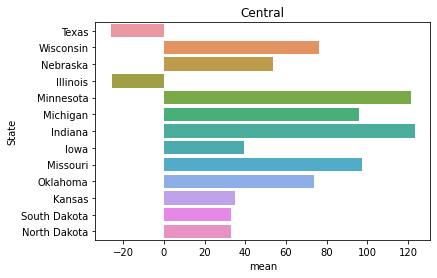

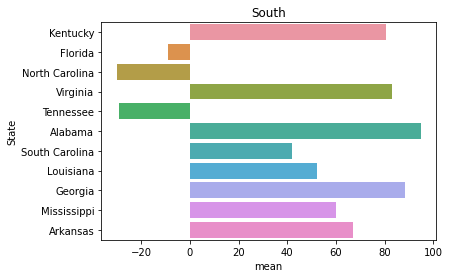

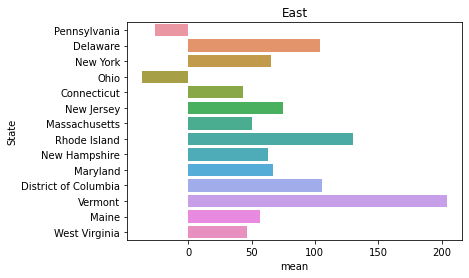

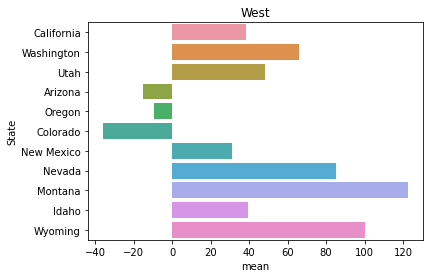

In [12]:
for i in d:
    ax=sns.barplot(y=states.loc[d[i]].index,x=states.loc[d[i]]['Profit']['mean'],orient='h')
    ax.set_title(i)
    plt.show()

#### an interseting thing is east region has both the extreme highest profit state and highest loss state
#### so maybe geography has nothing to do with the profit lets dig a little deeper

#### visualizing the top loss making states

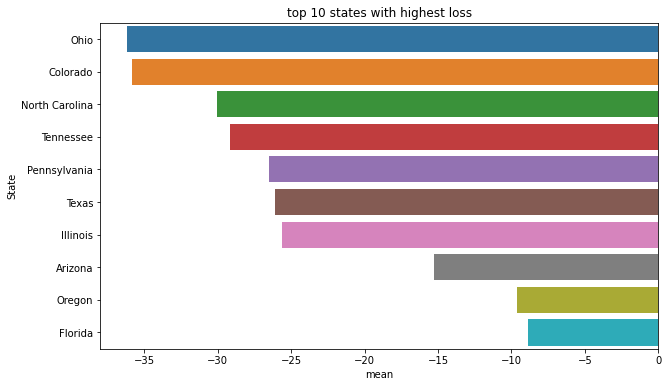

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(y=states.index[:10],x=states['Profit']['mean'][:10],orient="h")
plt.title('top 10 states with highest loss')
plt.show()

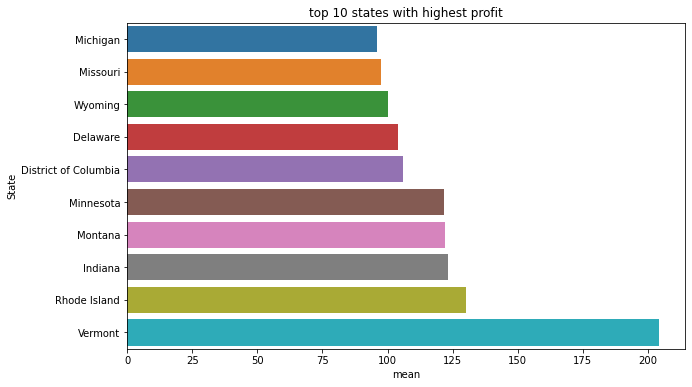

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(y=states.index[-10:],x=states['Profit']['mean'][-10:],orient="h")
plt.title('top 10 states with highest profit')
plt.show()

### lets take a deeper look at the profits

In [16]:
temp=df[df['Profit']>0]

Text(0.5, 1.0, 'countplot')

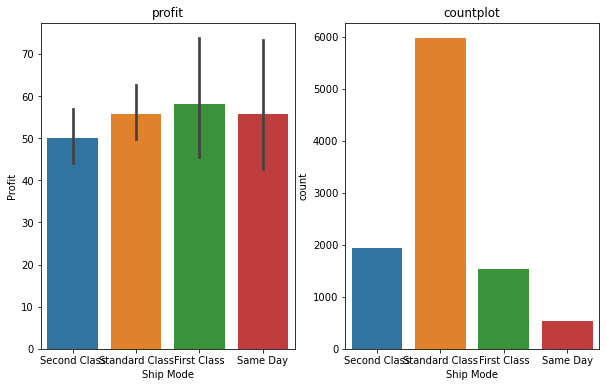

In [17]:
fig,ax=plt.subplots(1,2,figsize=(10,6))
sns.barplot(temp['Ship Mode'],temp['Profit'],ax=ax[0])
ax[0].set_title('profit')
sns.countplot(df['Ship Mode'],ax=ax[1])
ax[1].set_title('countplot')

#### second class shipping is most common also it gives good profit

Text(0.5, 1.0, 'countplot')

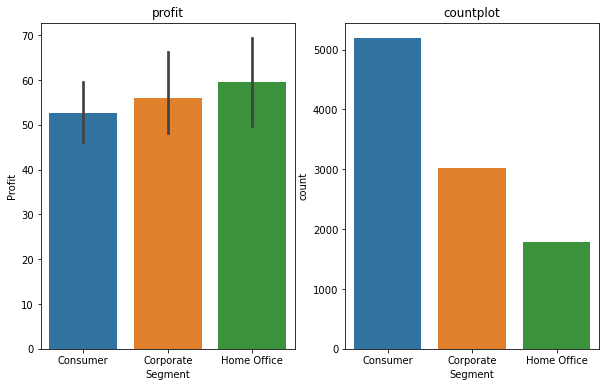

In [18]:
fig,ax=plt.subplots(1,2,figsize=(10,6))
sns.barplot(temp['Segment'],temp['Profit'],ax=ax[0])
ax[0].set_title('profit')
sns.countplot(df['Segment'],ax=ax[1])
ax[1].set_title('countplot')

#### consumer segment are main coustomers but they are not giving great profits

In [19]:
temp['Category'].value_counts()

Office Supplies    5111
Technology         1573
Furniture          1374
Name: Category, dtype: int64

In [20]:
data=temp.copy()
grouped_data=data.groupby(['Category','Sub-Category']).agg({'Profit': ['min', 'max','count','sum']})
grouped_data

Profit                             
                                  min        max count         sum
Category        Sub-Category                                      
Furniture       Bookcases      1.1596  1013.1270   117   8679.6500
                Chairs         1.3098   770.3520   362  36471.0076
                Furnishings    0.4176   387.5676   781  19550.0570
                Tables         2.4898   629.0100   114  14686.6672
Office Supplies Appliances     0.2925   793.7160   399  26767.6466
                Art            0.1533   112.5740   796   6527.7870
                Binders        0.4704  4946.3700   910  68732.2597
                Envelopes      0.5508   204.0714   254   6964.1767
                Fasteners      0.0792    21.8880   200    982.7134
                Labels         0.6786   385.3752   364   5546.2540
                Paper          1.0700   352.2960  1370  34053.5693
                Storage        0.2034   792.2691   661  27705.1302
                Supplies       0.0628   327.5060   157   1826.5224
Technology      Accessories    0.3399   829.3754   683  42867.2622
                Copiers       59.9980  8399.9760    68  55617.8249
                Machines       3.7570  2799.9840    71  33503.4251
                Phones         0.2598  1228.1787   751  52046.3541

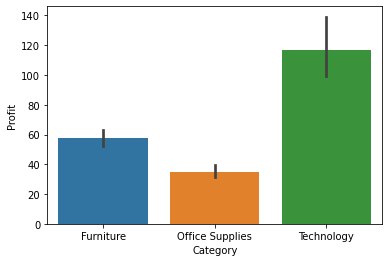

In [22]:
sns.barplot(temp['Category'],temp['Profit'])

#### technology and furniture categories are making huge profits even when they are not very common

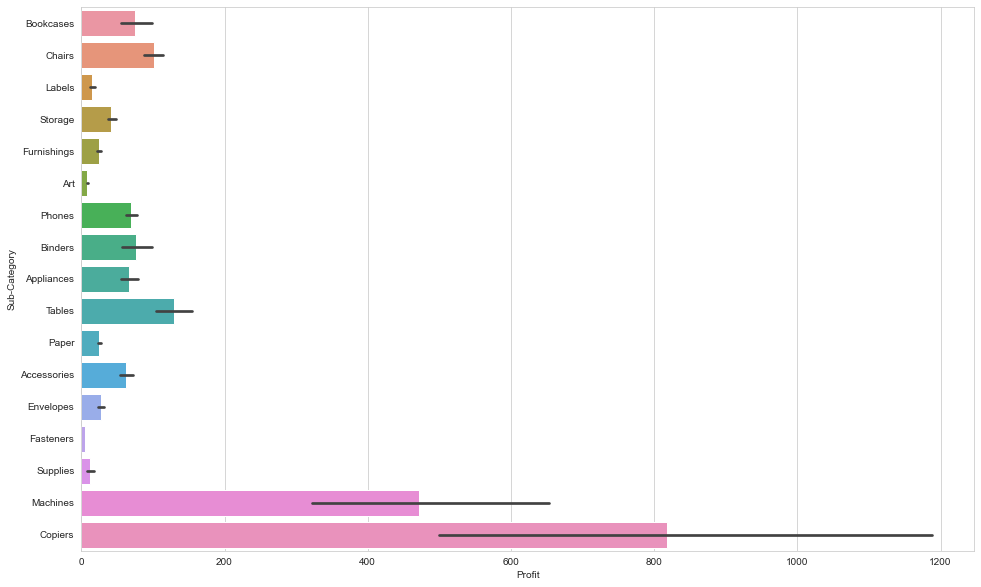

In [23]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,10))
sns.barplot(temp['Profit'],temp['Sub-Category'],orient='h')

#### copiers and machines are making great profits while these are the least common products

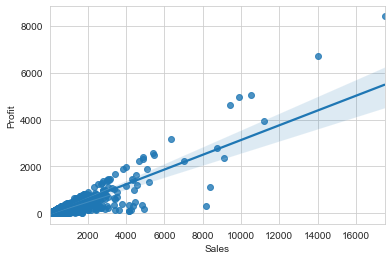

In [24]:
sns.regplot(x='Sales',y='Profit',data=temp)

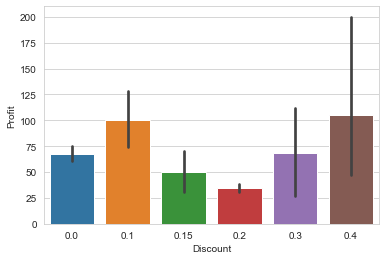

In [25]:
sns.barplot(x='Discount',y='Profit',data=temp)

#### products listed at 10% and 40% discounts are making good profits which are phones and chairs
#### phones and chairs are making good profits as seen in the above graph

In [27]:
temp[temp['Discount']==0.4][['Sub-Category']].mode()

,Sub-Category
0,Phones


In [28]:
temp[temp['Discount']==0.1][['Sub-Category']].mode()

,Sub-Category
0,Chairs


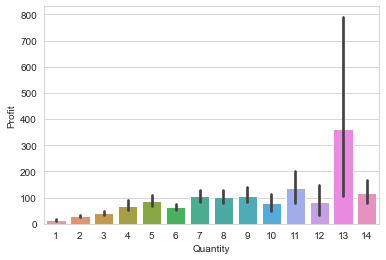

In [29]:
sns.barplot(x='Quantity',y='Profit',data=temp)

#### more quantity more profit also there is a huge jump at profit when quantity is 13

### loss

In [31]:
temp=df[df['Profit']<0]

In [32]:
temp['Category'].value_counts()

Office Supplies    886
Furniture          714
Technology         271
Name: Category, dtype: int64

In [33]:
data=temp.copy()
grouped_data=data.groupby(['Category','Sub-Category']).agg({'Profit': ['min', 'max','count','sum']})
grouped_data

Profit                          
                                    min     max count         sum
Category        Sub-Category                                     
Furniture       Bookcases    -1665.0522 -3.8864   109 -12152.2060
                Chairs        -630.8820 -0.8999   235  -9880.8413
                Furnishings   -427.4500 -0.3398   167  -6490.9134
                Tables       -1862.3124 -0.8886   203 -32412.1483
Office Supplies Appliances   -1181.2824 -1.1100    67  -8629.6412
                Binders      -3701.8928 -0.5964   613 -38510.4964
                Fasteners      -11.8256 -0.6048    12    -33.1952
                Storage       -337.8060 -0.2098   161  -6426.3038
                Supplies     -1049.3406 -0.3488    33  -3015.6219
Technology      Accessories    -75.5958 -0.0895    91   -930.6265
                Machines     -6599.9780 -1.8295    44 -30118.6682
                Phones        -386.3916 -0.6435   136  -7530.6235

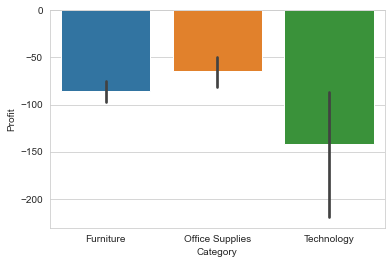

In [34]:
sns.barplot(temp['Category'],temp['Profit'])

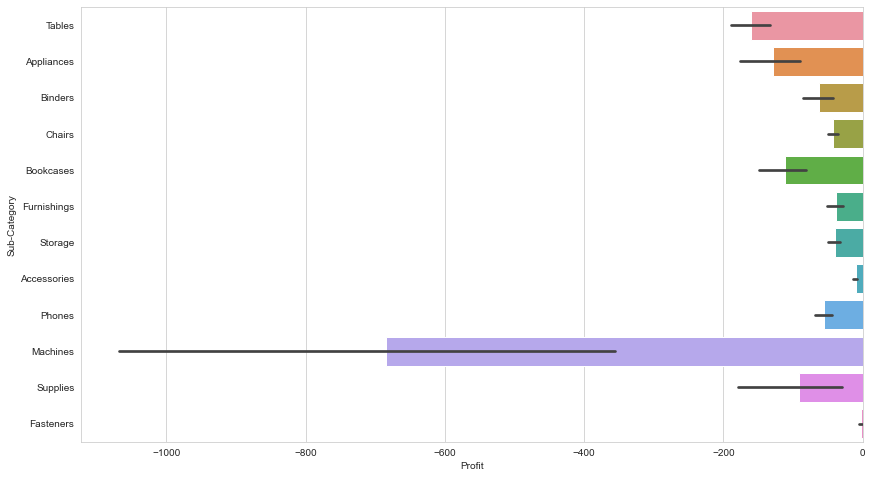

In [218]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,8))
sns.barplot(temp['Profit'],temp['Sub-Category'],orient='h')

### machines are moking good profits on the same time it is showing great losses too maybe machine may get damaged or get returned a lot because they get faulty

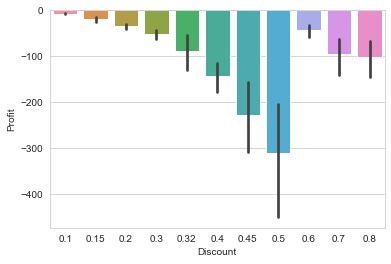

In [35]:
sns.barplot(x='Discount',y='Profit',data=temp)

#### loss is increasing exponentially as the discount is increasing but it dips after 50%

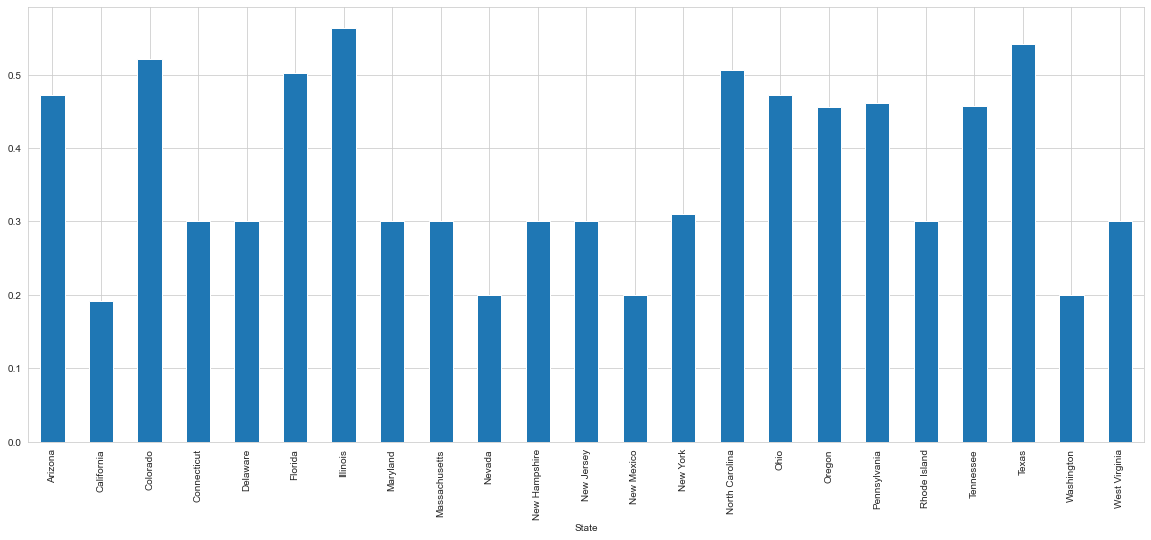

In [217]:
data=temp.copy()
grouped=data.groupby(['State']).agg({'Sales': 'mean','Discount':'mean','Quantity':'mean'})
grouped['Discount'].plot.bar(figsize=(20,8))

#### all the states with more than 40% discount are the top loss states

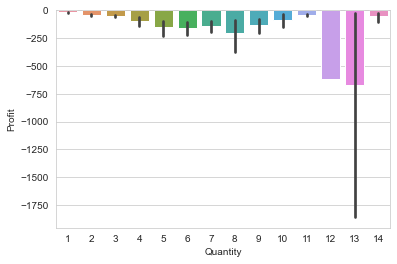

In [36]:
sns.barplot(x='Quantity',y='Profit',data=temp)

#### quantity 12 and 13 are showing huge losses

# insights

1. There is are wide customers ordering via second class so we must focus on that ship mode
2. Corporate and home office segment should be focussed as they are generating more profits
3. Advertising of copier, table, chai etc should be done as they are generating good profits
4. Furniture and technology categories should be advertised as the are generating good profits when their quantity is low
5. There should be a proper check up of machines before selling
6. Discounts should be reduced